# INTRODUCTION
   This kernel is about understanding correlation between rent amount and house's features.
   <br>
   Este núcleo trata da compreensão da correlação entre o valor do aluguel e os recursos da casa.
    
   1. [Load and Check Data](#1) 
   1. [Variable Description](#2)
   1. [Visualization and Data Correcting](#3)
       * [Data Correcting](#4)
       * [Visualization](#5)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv
/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv


<a id="1"></a><br>
# Load and Check Data

In [2]:
rent1=pd.read_csv("/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv")
rent2=pd.read_csv("/kaggle/input/brasilian-houses-to-rent/houses_to_rent_v2.csv")

In [3]:
rent1.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [4]:
rent1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [5]:
rent2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
rent2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


<a id="2"></a><br>
# Variable Description

1. City: The City where house has been built. / A cidade onde a casa foi construída.
1. Area: Property area. / Property area.
1. Rooms: Amount of rooms that house has. / Quantidade de quartos que a casa possui.
1. Bathroom: Amount of bathrooms that house has. / Quantidade de banheiros que a casa possui.
1. Parking Space: Amount of parking spaces that house has. / Quantidade de vagas de estacionamento que a casa possui.
1. Floor: Amount of floors that building has. / Quantidade de andares que o prédio possui.
1. Animal: Acceptance of animal of the house owner. / Aceitação do animal do dono da casa.
1. Furniture: Is the house furnished or not furnished. / A casa está mobilada ou não?
1. Hoa: Homeowners association tax. / Valor do condominio.
1. Rent Amount: Rent amount. / Valor do aluguel.
1. Property Tax: Tax amount for the property. / Valor do imposto para a propriedade.
1. Fire Insurance: Insurance against fire accidents. / Seguro contra acidentes de incêndio.
1. Total: Total of the money will be spent. / Total do dinheiro será gasto.

<a id="3"></a><br>
# Visualization and Data Correcting

<a id="4"></a><br>
## Data Correcting

In [7]:
# First we need to get rid of string values. Because of my not enough information about this subject I replaced sem info and Incluso as 0.
rent1.hoa.replace("Sem info","0",inplace=True)
rent1.hoa.replace("Incluso","0",inplace=True)
# In this part we changed object to integer.

rent1_hoa=[]
rent1_hoa=[each.replace("R$","0") for each in rent1.hoa]
rent1_hoa=[int(each.replace(",","")) for each in rent1_hoa]


In [8]:
# For rent amount we don't need to get rid of non-numerical values.
rent1_rent_amount=[each.replace("R$","") for each in rent1["rent amount"]]
rent1_rent_amount=[int(each.replace(",","")) for each in rent1_rent_amount]

In [9]:
# Again I changed Incluse to 0.
rent1["property tax"].replace("Incluso","0",inplace=True)

rent1_property_tax=[each.replace("R$","") for each in rent1["property tax"]]
rent1_property_tax=[int(each.replace(",","")) for each in rent1_property_tax]

In [10]:
# Fire insurance has no non-numerical values.
rent1_fire_insurance=[each.replace("R$","") for each in rent1["fire insurance"]]
rent1_fire_insurance=[int(each.replace(",","")) for each in rent1_fire_insurance]

In [11]:
#  Total has no non-numerical values.
rent1_total=[each.replace("R$","") for each in rent1.total]
rent1_total=[int(each.replace(",","")) for each in rent1_total]

In [12]:
# Floor values were object, because of that we changed them to integer.
rent1.floor.replace("-","0",inplace=True)
rent1.floor=rent1.floor.astype(int)

rent2.floor.replace("-","0",inplace=True)
rent2.floor=rent2.floor.astype(int)

<a id="5"></a><br>
## Visualization

In [13]:

y=rent1.total[:20]

trace1=go.Bar(
              x=rent1.rooms,
              y=y,
              name="Rooms",
              marker=dict(color="rgba(255,122,32,0.5)",
                          line=dict(color="rgb(0,0,0)",width=0.025)),
              text=rent1.rooms
)

trace2=go.Bar(
              x=rent1["parking spaces"],
              y=y,
              name="Parking Spaces",
              marker=dict(color="rgba(123,212,10,0.5)",
                        line=dict(color="rgb(0,0,0)",width=0.025)),
              text=rent1["parking spaces"]
    
)

data=[trace1,trace2]
layout=go.Layout(barmode="group")
fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [14]:
df1=rent1.bathroom.iloc[:20]
df2=rent2.bathroom.iloc[:20]
df3=pd.concat([df1,df2],axis=0,ignore_index=True)

pie_list=[df3]
labels=df3.unique()


fig = { 
    "data": [
        {
            "values": pie_list,
            "labels": labels,
            "domain":{"x":[0,.5]},
            "name":"Number of Bathroom Rates",
            "hoverinfo":"label+percent+name",
            "hole":.3,
            "type":"pie",
            
        },
    ],
    "layout": {
        "title":"House's Numbers of Bathroom Rates",
        "annotations":[
            {"font":{"size":20},
             "showarrow":False,
             "text":"Number of Bathrooms",
             "x":0.2,
             "y":1
            },
        ]
    }
    
}


iplot(fig)

In [15]:
import plotly.figure_factory as ff

df=rent2.iloc[:100]
data=df.loc[:,["property tax (R$)","fire insurance (R$)","total (R$)"]]

data["index"]=np.arange(1,len(data)+1)

fig=ff.create_scatterplotmatrix(data,diag="box",index="index",colormap="Portland",colormap_type="cat",height=700,width=700)

iplot(fig)

In [16]:
rent2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


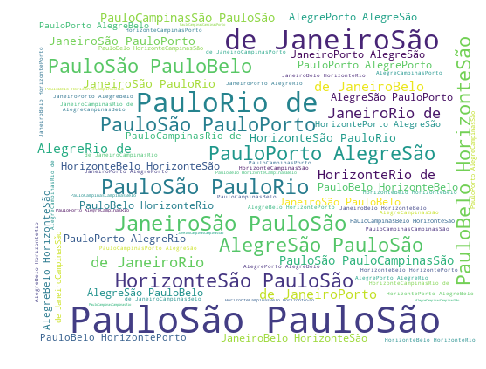

In [17]:
plt.subplots(figsize=(8,8))



wordcloud=WordCloud(
                     background_color="white",
                     width=512,
                     height=384,
                    ).generate("".join(rent2.city))



plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png")

plt.show()

In [18]:
trace1=go.Scatter3d(
    x=rent1_total[:20],
    y=rent1_property_tax[:20],
    z=rent1_fire_insurance[:20],
    mode="markers",
    marker=dict(size=10,
                color="rgb(250,42,134)",))

data=[trace1]
layout=go.Layout(
margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
    )
)

fig=go.Figure(data=data,layout=layout)

iplot(fig)